# Lab3 - Mushroom Classification
Author: *Ali Zia Ahmed*


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We are going to follow the following workflow: Split data into training and test set. Use the training portion to find the best model (optionally using grid search) and cross-validation. Evaluate the *winner* on the test set.

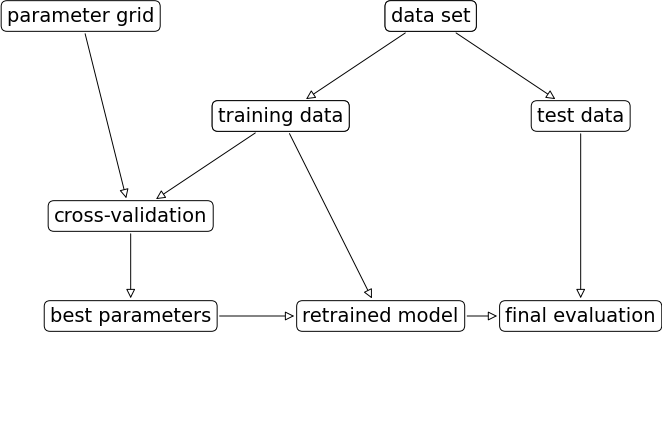

In [3]:
import mglearn
mglearn.plots.plot_grid_search_overview()

## 0. Function definitions

In [4]:
from sklearn.model_selection import cross_validate


def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    '''Calculate train and validation scores of classifier (model) using cross-validation
        
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        scoring (str): a scoring string accepted by sklearn.metrics.cross_validate()
        cv (int): number of cross-validation folds see sklearn.metrics.cross_validate()
        
        returns: mean training score, mean validation score
    
    '''
    scores = cross_validate(model, X, y, return_train_score=True)
    mean_training= np.average(scores['train_score'])
    mean_test= np.average(scores['test_score'])
    
    return mean_training ,mean_test
    
     #TODO: implement function body
    

In [5]:
# OPTIONAL METHOD
def print_grid_search_result(grid_search):
    '''Prints summary of best model from GridSearchCV object.
    
        For the best model of the grid search, print:
        - parameters 
        - cross-validation training score
        - cross-validation validation score 
        
        scores are printed with 3 decimal places.
    
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        returns: None
        
    '''
    print("Best parameters: {}".format(grid_search.best_params_))
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
    print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
    
     #TODO: implement function body
    

In [6]:
import mglearn

def plot_grid_search_results(grid_search):
    '''For grids with 2 hyperparameters, create a heatmap plot of test scores
        
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        uses mglearn.tools.heatmap() for plotting.
    
    '''
    results = pd.DataFrame(grid_search.cv_results_)

    params = sorted(grid_search.param_grid.keys())
    
    assert len(params) == 2, "We can only plot two parameters."
    
    # second dimension in reshape are rows, needs to be the fast changing parameter
    scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                      len(grid_search.param_grid[params[1]]))

    # plot the mean cross-validation scores
    # x-axis needs to be the fast changing parameter
    mglearn.tools.heatmap(scores, 
                          xlabel=params[1], 
                          xticklabels=grid_search.param_grid[params[1]], 
                          ylabel=params[0], 
                          yticklabels=grid_search.param_grid[params[0]],
                          cmap="viridis", fmt="%0.3f")

In [53]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_actual, y_pred, labels, title=''):
    '''Creates a heatmap plot of the confusion matrix.
    
        y_actual (pandas.DataSeries or numpy.Array): Ground truth label vector
        y_pred (pandas.DataSeries or numpy.Array): Predicted label vector
        labels (list(str)): Class names used for plotting (ticklabels)
        title (str): Plot title
        
        uses sklearn.metrics.confusion_matrix
        
    '''
    cm = confusion_matrix(y_actual, y_pred)
#     cm.set_xlabel(labels[0])
#     cm.set_xlabel(labels[1]) 
    return cm
    
   

## 1. Load data
yellowbrick mushroom  
https://www.scikit-yb.org/en/latest/api/datasets/mushroom.html




### 1.1 Prepare the feature matrix and target vector

Using the yellowbrick `load_mushroom()` function, load the mushroom data set into feature matrix `X` and target vector `y`.

Print shape and type of `X`, `y`.

In [8]:
from yellowbrick.datasets import load_mushroom
X,y = load_mushroom()
print('X Shape and type:',X.shape,type(X))
print('y Shape and type:',y.shape,type(y))

X Shape and type: (8123, 3) <class 'pandas.core.frame.DataFrame'>
y Shape and type: (8123,) <class 'pandas.core.series.Series'>


## 2. Inspect the data 

### 2.1 Relationship between features and target classes

To understand the relationship between categorical features and target classes better, it is usefull to produce barplots with bars for each target class. Using seaborn `countplot()`, produce a barplot for each of the three feature columns in `X` using  `y` as hue.

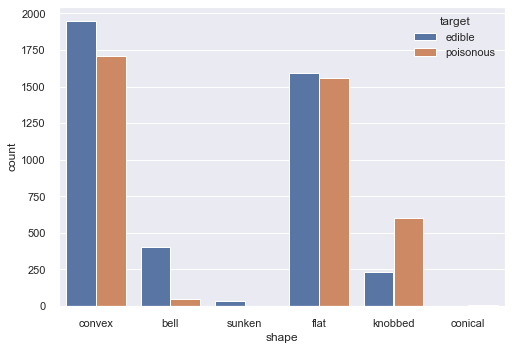

In [9]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="shape", data=X, hue=y)

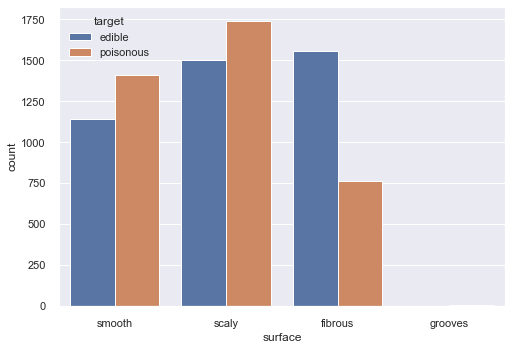

In [10]:
ax1 = sns.countplot(x="surface", data=X, hue=y)

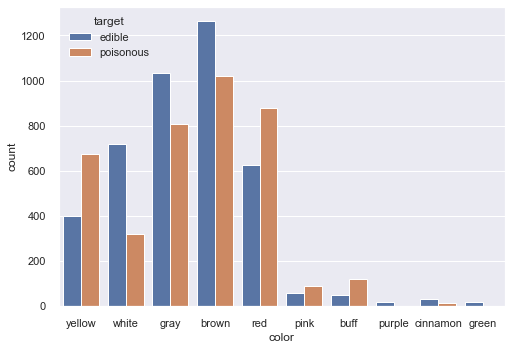

In [11]:
ax2 = sns.countplot(x="color", data=X, hue=y)

In [12]:
# TODO: add countplots for each feature.
#how can i have all the outputs on the same code cell???


## 3. Preprocessing
In this dataset, all features are discrete and nominal and need to be encoded. You will use a `OneHotEncoder`.

The target vector is discrete and nominal as well. While sklearn is OK using string labels, you will use a `LabelEncoder` to convert strings to integers and keep the encoder to translate between the two representations.

### 3.1 Onehot encoding of features
Use `OneHotEncoder` to convert `X` into one-hot-encoded features stored in a varible `X_enc`. Use `spares=False`. Print shape of `X_enc`.

In [13]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
X_enc = ohe.fit_transform(X)
X_enc.shape


(8123, 20)

In [14]:
# TODO: add OneHotEncoder here
#done

### 3.2 Label encode target vector 
Use `LabelEncoder` to encode the target vector `y`, saved in a varibale `y_enc`.

Print the resulting target vector `y_enc` and print the class names available in the `classes_` attribute of the `LabelEncoder` object.

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y)
print(y_enc)
print(le.classes_)

[0 0 1 ... 0 1 0]
['edible' 'poisonous']


In [16]:
# TODO: add LabelEncoder here
#done

### *Question 1:* How are class label strings mapped to integers? Show an example for both.
Hint: use `transform()` or `inverse_transform()` method of the `LabelEncoder` object.

The labelEncoder assigns numerical values to a list of different data values, this seperates the data into its categories. The transform function is used when you pass an array fo strings with the previous categories inot labelEncoder, this returns a list of numbers that corrolates with the number assigned to the category initially. The reverse is also possible, you can pass a list of numbers tolabel encoder and it will return the category labels in the form of a string array. 

In [17]:
le.transform(["edible", "poisonous"])

array([0, 1])

In [18]:
list(le.inverse_transform([0,1]))

['edible', 'poisonous']

## 4. Create training and test sets
Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X_enc` and `y_enc` into training and test sets.

In [19]:
# TODO: add train_test_split() here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, random_state=37)

## 5. Compare models using cross-validation
Create a list containing a `LogisticRegression()`, 
          `SVC()`,
          `BernoulliNB()`,
        `RandomForestClassifier(random_state=55)`, 
         `GradientBoostingClassifier(random_state=56)` objects.

Iterate this list, then:
- compute the **average precision** using `get_classifier_cv_score()` defined above, 
- rank the models based on validation **average precision** (best first),
- and print the ranked models training and validation scores with **3 decimal places**. 

Use training data and 7-fold cross-validation.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
Dict = {}

models = [LogisticRegression(), SVC(), BernoulliNB(), RandomForestClassifier(random_state=55)
         , GradientBoostingClassifier(random_state=56)]

for i in models:
    [train_score ,test_score] = get_classifier_cv_score(i, X_train, y_train)
    Dict[i]=test_score
    
rank = sorted(Dict, key=Dict.get, reverse=True)
nu = len(models)

for ii in range(nu):
     [train_score ,test_score] = get_classifier_cv_score(rank[ii], X_train, y_train)
     print('model:' , rank[ii], '\ntrain score:' ,round(train_score,3) , '\ntest_score:',round(test_score,3) ,'\n')

model: SVC() 
train score: 0.719 
test_score: 0.707 

model: RandomForestClassifier(random_state=55) 
train score: 0.719 
test_score: 0.706 

model: GradientBoostingClassifier(random_state=56) 
train score: 0.712 
test_score: 0.7 

model: LogisticRegression() 
train score: 0.67 
test_score: 0.669 

model: BernoulliNB() 
train score: 0.629 
test_score: 0.627 



## 6. (optional) Hyperparameter tuning using grid search 

The inital cross-validation above showed that both DecisionTree based models might have merit. 

Support vector machine classifier might also perform well if properly tuned.

Next, hyperparameters are tuned using grid search.

### 6.1 Grid search for RandomForestClassifier 

Perform grid search using `GridSearchCV` for the `RandomForestClassifier(random_state=55)`.

Grid search to use 7-fold cross-validation, and `average_precision` as the scoring function. Note that there is a `n_jobs` parameter to run search in parallel. Setting it to the number of CPU cores works well.

Use the following hyperparameters and values:
- `'n_estimators': [300, 500, 700, 1000]`
- `'max_depth': [7, 9, 11, 13]`

Use `print_grid_search_result()` and `plot_grid_search_result()` functions defined above to show the results.

In [22]:
# TODO: Setup grid search for RandomForestClassifier(random_state=55)
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [300, 500, 700, 1000],
              'max_depth': [7, 9, 11, 13]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=55), param_grid, cv=5,
                          return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc)

In [23]:
# TODO: perform the grid search by calling fit()
gv = grid_search.fit(X_train, y_train)
gv

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=55),
             param_grid={'max_depth': [7, 9, 11, 13],
                         'n_estimators': [300, 500, 700, 1000]},
             return_train_score=True)

In [24]:
# TODO: call print_grid_search_result() to print the results
print_grid_search_result(gv)

Best parameters: {'max_depth': 13, 'n_estimators': 700}
Best cross-validation score: 0.71
Test set score: 0.71


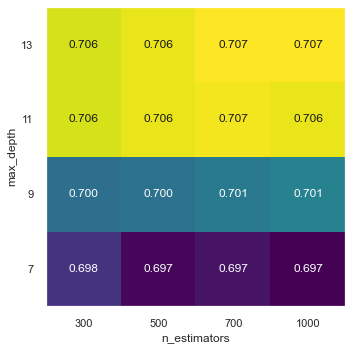

In [25]:
# TODO: call plot_grid_search_results() to plot validation metrics for all hyperparameter combinations
plot_grid_search_results(gv)

### 6.2 Gradient boosting classifier 
Perform grid search using `GridSearchCV` for the `GradientBoostingClassifier(max_depth=5, random_state=56)`.

Grid search to use 7-fold cross-validation, and `average_precision` as the scoring function. Note that there is a `n_jobs` parameter to run search in parallel. Setting it to the number of CPU cores works well.

Use the following hyperparameters and values:
- `'n_estimators': [50, 100, 200]`,
- `'learning_rate': [0.001, 0.01, 0.1, 1.0]`

Use `print_grid_search_result()` and `plot_grid_search_result()` functions defined above to show the results.

In [26]:
# TODO: Setup grid search for GradientBoostingClassifier(max_depth=5, random_state=56)
# TODO: Setup grid search for RandomForestClassifier(random_state=55)
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.001, 0.01, 0.1, 1.0]}

grid_search = GridSearchCV(GradientBoostingClassifier(max_depth=5, random_state=56), param_grid, cv=5,
                          return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc)

In [27]:
# TODO: perform the grid search by calling fit()
gvb = grid_search.fit(X_train, y_train)
gvb

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=5, random_state=56),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [28]:
# TODO: call print_grid_search_result() to print the results
print_grid_search_result(gvb)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation score: 0.71
Test set score: 0.71


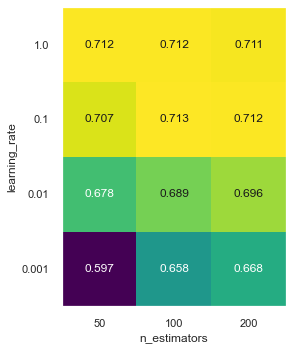

In [29]:
# TODO: call plot_grid_search_results() to plot validation metrics for all hyperparameter combinations
plot_grid_search_results(gvb)

### 6.3 SVC grid search
Perform grid search using `GridSearchCV` for the `SVC()`.

Grid search to use 7-fold cross-validation, and `average_precision` as the scoring function. Note that there is a `n_jobs` parameter to run search in parallel. Setting it to the number of CPU cores works well.

Use the following hyperparameters and values:
- `'C': [0.0001, 0.001, 0.01, 0.1]`
- `'gamma': [0.1, 1, 10, 100]`

Use `print_grid_search_result()` and `plot_grid_search_result()` functions defined above to show the results.

In [26]:
# TODO: Setup grid search for SVC()
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1],
              'gamma': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc)

In [27]:
# TODO: perform the grid search by calling fit()
gvbc = grid_search.fit(X_train, y_train)
gvbc

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1],
                         'gamma': [0.1, 1, 10, 100]},
             return_train_score=True)

In [28]:
# TODO: call print_grid_search_result() to print the results
print_grid_search_result(gvbc)

Best parameters: {'C': 0.1, 'gamma': 10}
Best cross-validation score: 0.70
Test set score: 0.71


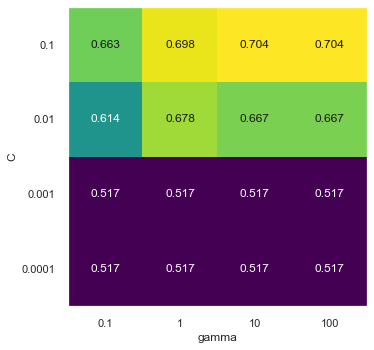

In [29]:
# TODO: call plot_grid_search_results() to plot validation metrics for all hyperparameter combinations
plot_grid_search_results(gvbc)

### *Question 2:* What are the training and validation scores of the three tuned (best) models? Summarize the results here.

RandomForestClassifier(random_state=55)
Best parameters: {'max_depth': 11, 'n_estimators': 500}
Best cross-validation score: 0.71
Test set score: 0.70

GradientBoostingClassifier(max_depth=5, random_state=56)
Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation score: 0.71
Test set score: 0.71

SVC()
Best parameters: {'C': 0.1, 'gamma': 10}
Best cross-validation score: 0.70
Test set score: 0.71


## 7. (optional) Best model: Find a better threshold

### 7.1 Precision and recall curve

From the results above, it looks like `GradientBoosingClassifier()` performs well.

Using the training dataset and best `GradientBoosingClassifier()` from the grid search above:
1. Calculate predicted probabilities using `cross_val_predict()` with parameters `cv=7, method='predict_proba'`.
2. Plot the precision-recall curve indicating where the default threshold 0.5 lies (see lecture notebook for an example).

Include a legend and axis labels.


In [30]:
#TODO: Calculate predicted probabilities using cross_val_predict(cv=7, method='predict_proba')
from sklearn.model_selection import cross_val_predict
model = GradientBoostingClassifier(learning_rate= 1.0, n_estimators= 200)
pred_probab = cross_val_predict(model, X_train, y_train,
                             method='predict_proba', cv=7)


In [31]:
y_train.shape

(6092,)

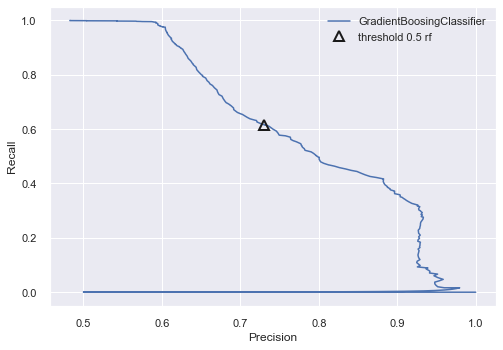

In [32]:
#TODO: Plot precision-recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_train, pred_probab[:, 1])
plt.plot(precision, recall, label="GradientBoosingClassifier")



close_default_rf = np.argmin(np.abs(thresholds - 0.5))
plt.plot(precision[close_default_rf], recall[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

### 7.2 Find a better threshold
It is important in this application to achieve high recall. Determine the probability threshold to achieve recall higher than 0.999. Store this threshold in a variable and print it.

In [33]:
#TODO: Find and print threshold for recall>0.999

ar = []
for t in range(len(recall)):
    if recall[t]>0.999:
        ar.append(thresholds[t])

sum(ar)/len(ar) #i dont know if i did it right


5.351207881329911e-103

## 8. Retrain best model
Retrain the best `GradientBoostingClassifier()` from the grid search above on the training dataset.

In [54]:
#TDOD: Retrain gradient boosting classifier
model = GradientBoostingClassifier(learning_rate= 1.0, n_estimators= 200)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=200)

## 9. Evaluate on test data

Using the retrained model and the test dataset:
- print the classification report
- plot the confusion matrix using plot_confusion_matrix()

Make sure the plot has class labels and a title.

Repeat these steps for the default threshold and the optimal threshold determined in step 7.

### 9.1 Evaluation with default threshold

In [57]:
#TODO: print classification report using default threshold
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
tr_ac = model.score(X_train, y_train)
val_ac = model.score(X_test, y_test)

print(tr_ac)
print(val_ac)

0.7133946158896914
0.7139340226489415


In [61]:
#TODO: call plot_confusion_matrix(), use LabelEncoder classes_ to get labels
mt = plot_confusion_matrix(y_test, y_test_pred, labels=str(le.classes_), title='')
mt

array([[835, 223],
       [358, 615]], dtype=int64)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, target_names=le.classes_)) 

              precision    recall  f1-score   support

      edible       0.70      0.79      0.74      1058
   poisonous       0.73      0.63      0.68       973

    accuracy                           0.71      2031
   macro avg       0.72      0.71      0.71      2031
weighted avg       0.72      0.71      0.71      2031



### 9.2 (optional) Evaluation with new threshold form Step 7.

In [ ]:
#TODO: print classification report using default threshold


In [ ]:
#TODO: call plot_confusion_matrix(), use LabelEncoder classes_ to get labels


### *Question 3:* What are the precision, recall and accuracy on the test set using the default and optimal thresholds of the best gradient boosting model?

       precision    recall  f1-score   support

      edible       0.70      0.79      0.74      1058
   poisonous       0.73      0.63      0.68       973

    accuracy                           0.71      2031
   macro avg       0.72      0.71      0.71      2031
weighted avg       0.72      0.71      0.71      2031


I used the classification report to answer the questions. I did not do the optional section since my threshold calcuation doesnt match.

### *Question 4:* How many false negatives does the model produce on the test set with the default and optimal thresholds of the best gradient boosting model?

Since I didnt do the optimal threshold confusion matrix, I will use the values already given for the optional section. 

It produced 0 false negavtives. All the poision mushrooms were predicted to be poisonous from the data already given from lab 3. I dont have it here since I ran all the cells but I am using that data from github to see the values and answer the questions. 

## 10. Conclusion

In conclusion, comment on the following items:
1. In the classification of edible vs poisonous mushrooms, why is high recall desired?
1. In the classification of edible vs poisonous mushrooms, what do false positive and false negative predictions imply and what are the consequences of making these mistakes?
1. Is the final model satisfactory, i.e. a useful model for the task, or is more work needed? Explain.

1. We cant afford low recall because we are dealing with poision and edible food. It needs to have a high recall so it doesnt predict wrongly since eating a poison mushroom thinking it was edible is a big problem.

2. False positives imply that the mushroom is predicted to be edible but it actaully is poisonous. A false negavtive is when a mushroom is predicted to be poisinous but it actually is edible. The consequences would range from being poisoned by a predicted 'edible mushroom' to not havibg enough mushrooms since you predict most of them are poisionous. 

3. More work is definately needed, the final model needed higher true postives and true negatives. Overall the acuracy needs to be a lot higher since we are dealing with poision, 70 percent is not good enough odds to trust the predictions of the model all the time. 


## 11. Reflection
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment.

*ADD YOUR THOUGHTS HERE*



In [ ]:
I liked the problem it self but I found the threshold part challanging, also the confusion matrix was also tricky. 